In [29]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


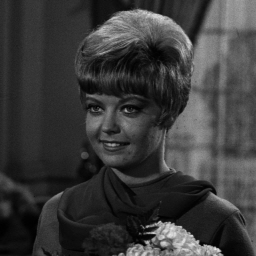

In [30]:
img = cv2.imread('/content/gdrive/My Drive/di/Images/girl.jpg')
print(img.shape)
glmg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(glmg)

In [31]:
outlmg = np.zeros(glmg.shape, dtype='uint8')

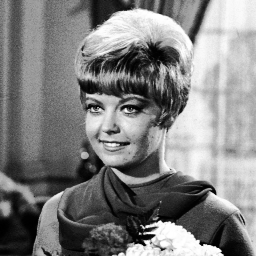

In [32]:
outlmg = cv2.equalizeHist(glmg)
cv2_imshow(outlmg)

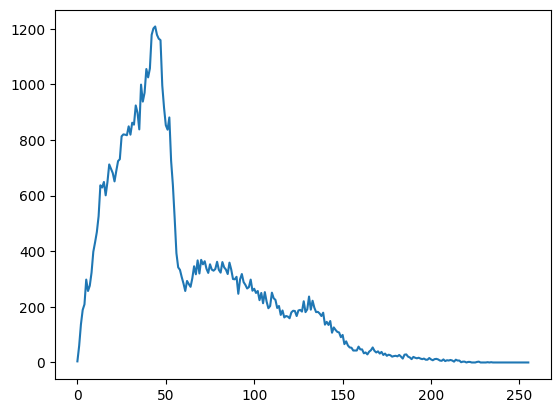

In [33]:
hist = cv2.calcHist([glmg], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

In [34]:
myHist = np.zeros((256, 1), dtype=np.int32)

히스토그램 만들기

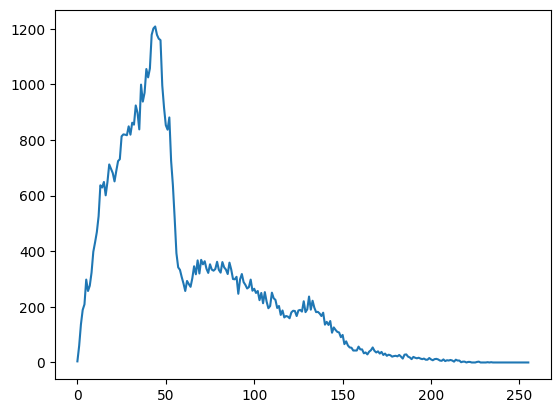

In [35]:
for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
        myHist[glmg[h, w]] += 1

plt.plot(myHist)

In [36]:
for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
        myHist[glmg[h, w]] = myHist[glmg[h, w]] + 1
  # The following line was incorrect. It should not reassign myHist in the inner loop.
  # myHist = hist[h]

In [37]:
cumulHist = np.zeros((256, 1), dtype=np.int32)

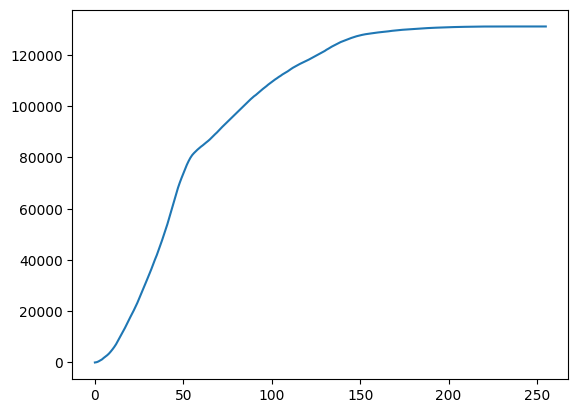

In [38]:
cumulHist[0] = myHist[0]
for i in range(1, 256):
  cumulHist[i] = cumulHist[i - 1] + myHist[i]

plt.plot(cumulHist)

In [39]:
cumulHist = np.zeros((256), dtype=np.int32)

/tmp/ipython-input-2109163845.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cumulHist[0] = myHist[0]
/tmp/ipython-input-2109163845.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cumulHist[i] = cumulHist[i - 1] + myHist[i]


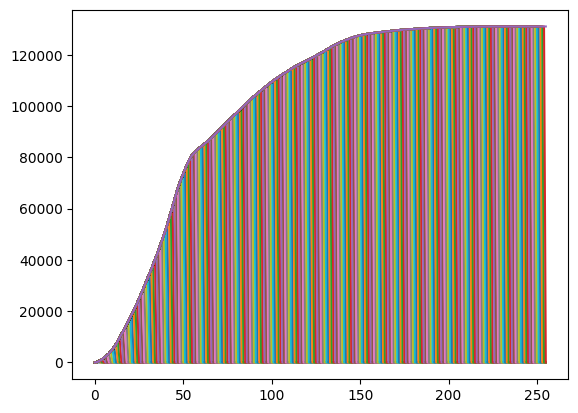

In [40]:
cumulHist[0] = myHist[0]
for i in range(1, 256):
  cumulHist[i] = cumulHist[i - 1] + myHist[i]

  plt.plot(cumulHist)


히스토그램 평활화

In [41]:
equalHist = np.zeros((256, 1), dtype=np.int32)

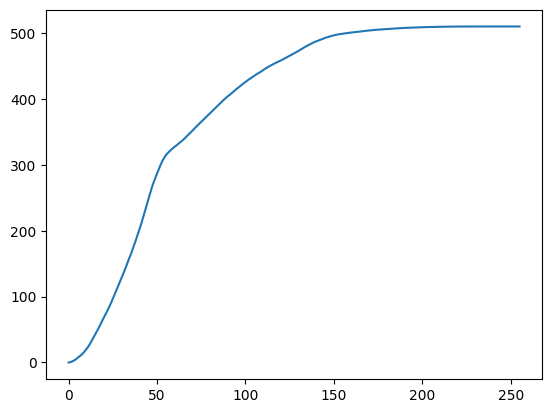

In [42]:
num0fimg = glmg.shape[0] * glmg.shape[1]
equalHist = cumulHist / num0fimg
equalHist = equalHist * 255

plt.plot(equalHist)

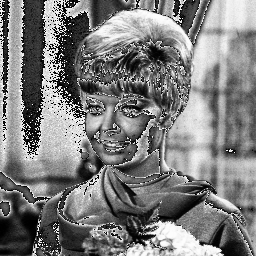

In [43]:
for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
        outlmg[h, w] = equalHist[glmg[h, w]]

cv2_imshow(outlmg)